## Plots
Use this module to prepare plots produced with data `data_taking.ipynb` contained in the `./data` folder


In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Resonator Lamb shift
#### Purpose: 
Visualize the cavity resonance Lamb shift as the qubit 'cools down' to its ground state. In this way we understand which readout power regime is OK for doing other measurements.<br>
If the VNA power is too high, we excite the qubit regardless of being off-resonance. <br>
Note: paramp was off.

$x$: VNA frequency. <br>
$y$: Readout pulse power that arrives at the resonator, taking into account Cryostat attenuation, VNA power (variable), and -35 dBm additional attenuation. <br>
$z$: $S_{12}$ at every VNA sweep frequency.

#### Observations: 
Weird mustache at around -92 dBm
#### Conclusions: 
VNA output power at -30 dBm is reasonably far from the transition region. Hopefully. However, after looking carefully at the plot, maybe -35 dBm should be tested aswell.

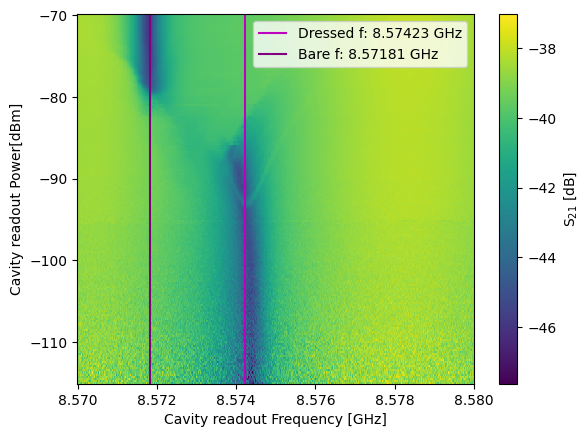

In [3]:
# TODO: If we want to get a precise value to set vertical lines, we should fit with a proper fit function the resonances in the two regimes.
data = np.load("data/lamb_shift.npy")
vna_sweep = np.linspace(8.57,8.58,501)
rdt_power = np.linspace(-40,5,181) 

fdressed = 8.57422899745694
fbare = 8.57181482757304
plt.pcolormesh(vna_sweep, rdt_power - 40-35, data)
plt.colorbar(label=r"S${}_{21}$ [dB]")
plt.xlabel('Cavity readout Frequency [GHz]')
plt.ylabel('Cavity readout Power[dBm]')
plt.axvline(fdressed, color="m",label=f'Dressed f: {fdressed:.5f} GHz')
plt.axvline(fbare, color="purple",label=f'Bare f: {fbare:.5f} GHz')

plt.legend()

### Preliminar spectroscopy
Setting the VNA output power to -30 dBm, we also turn on the drive. Drive signal goes through the resonator, and it's hard to determine an optimal drive power a priori. We expect to have resonances at about 6.5 GHz. <br>
#### Purpose
Preparing for the actual two-tone spectroscopy. <br>
The typical two-tone spectroscopy is very hard to achieve without a broad scan in frequency-power of the drive. Our preliminary attempts failed miserably.
So we did a VNA acquisition at different drive power/frequency combination. We fitted every acquisition with a naive Cauchy cuve for estimmanting the resonator frequency.br>

$x$ drive amplitude
$y$ drive frequency
$z$ cavity frequency obtained by fitting the VNA $S_{12}$ scan
#### Observation
Plot not very convincing overall. We cannot explain so well the blue regions. However the frequency shift seems to be comparable with 500 Hz, close to the NIST value. The frequency where this happens is close to $\omega_{01}$ in the NIST measure.
#### Conclusion
We must repeat this measure at lower drive powers and broader frequencies.


Text(0, 0.5, 'SMA frequency [GHz]')

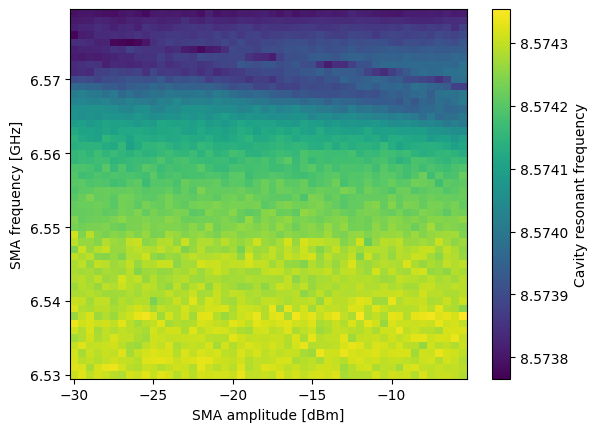

In [30]:
from scipy.optimize import curve_fit
two_tone_scan = np.load("data/preliminar_spectroscopy.npy")
two_tone_scan = two_tone_scan[:50, :50] # only the first 50x50 block was filled with data
resonances = np.zeros((50,50, 4))

freq_vna_centre = 8.57436e9 

freq_vna = np.linspace(freq_vna_centre - 2e6, freq_vna_centre + 2e6, 101)
freq_sma = np.linspace(6.53e9, 6.58e9, 51)
amplitude_sma = np.linspace(-30, -5, 51)

def cauchy_slope(x, freq, gamma, amplitude, offset):
    """ Resonance-fit function.
    We must sobstitute it with a more sophisticated function
    """
    return offset + amplitude * gamma/((x-freq)**2 + gamma**2)

for i in range(50):
    for j in range(50):
        resonances[i,j], pcov = curve_fit(cauchy_slope, freq_vna, two_tone_scan[i,j], [freq_vna_centre, 1e+5,-1000000, -40 ])
plt.pcolormesh(amplitude_sma[:-1], freq_sma[:-1]*1e-9, resonances[:,:,0]*1e-9)
plt.colorbar(label="Cavity resonant frequency")
plt.xlabel('SMA amplitude [dBm]')
plt.ylabel('SMA frequency [GHz]')
# plt.clim(8.5735, 8.5745)